In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_norm = pd.read_csv('df/6_clear_normalised.csv')

Let's set a function that removes parameters that have a correlation greater than the specified trashold

In [3]:
def remove_corr(df_corr, df, crop_value):
    
    # restrict the upper triangle in order to later select the features 
    upper_tri = df_corr.where(np.triu(np.ones(df_corr.shape), k=1) != 0)

    # select the parameters that need to be removed
    to_drop = [column for column in upper_tri.columns if any((upper_tri[column] > crop_value))]
    print('Number of strongly correlated parameters:', len(to_drop))

    # get a dataframe of weakly and moderately correlated features
    df_small = df.drop(to_drop, axis=1)

    return df_small

### Linear correlation

To start with Pearson correlation coefficients between all parameters and visualize this with heatmap. These coefficients illustrate the linear correlation of the two values

In [4]:
# calculate the coefficients by absolute value
df_corr = df_norm.iloc[:, 1:].corr(method='pearson').abs()

<Axes: >

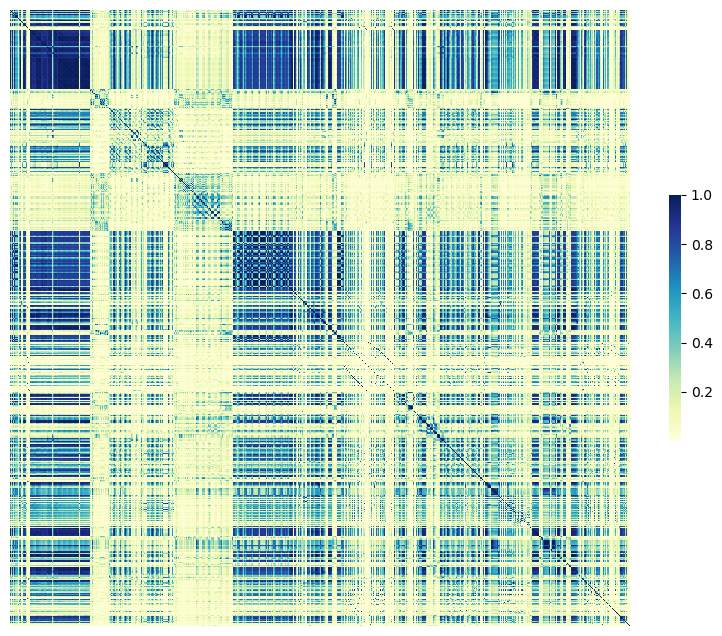

In [5]:
# build a heat map
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(df_corr, cmap="YlGnBu", yticklabels=False, xticklabels=False, ax=ax, cbar_kws={"shrink": 0.4})

Of course, in practical problems, thermal diagrams are rarely applied to high-dimensional data, because they have low informativeness. However, as we can see, some of the parameters have a low correlation between each other. Let's try to remove the features whose correlation is strong and exceeds the value of 0.6. 

In [6]:
# apply a function that removes strongly correlated parameters
df_small = remove_corr(df_corr, df_norm.iloc[:, 1:], 0.6)

Number of strongly correlated parameters: 910


In [7]:
# calculate the coefficients by absolute value
df_small_corr = df_small.corr(method='pearson').abs()

<Axes: >

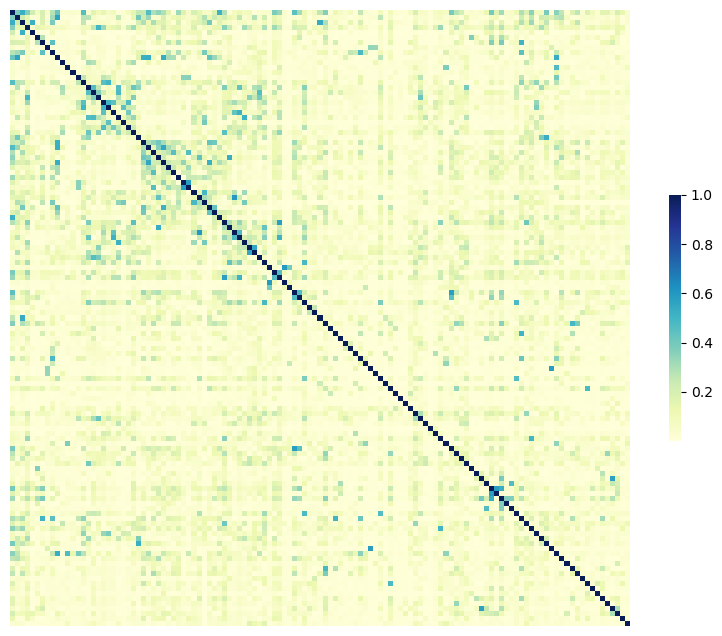

In [8]:
# build a heat map
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(df_small_corr, cmap="YlGnBu", xticklabels=False, yticklabels=False, ax=ax, cbar_kws={"shrink": 0.4})

At this point, the heatmap looks much clearer, however, the number of features is still large to display descriptor names. However, we can recognize the number of them.

In [9]:
# calculate the number of parameters after removing the strong correlations
print('Number of remaining parameters:', len(df_small.columns))

Number of remaining parameters: 123


### Non-linear correlation

Also, after removing the linear Pearson correlations, we can check for non-linear correlations by calculating Spearman correlation coefficients.

In [10]:
# calculate the coefficients by absolute value
df_corr = df_small.corr(method='spearman').abs()

<Axes: >

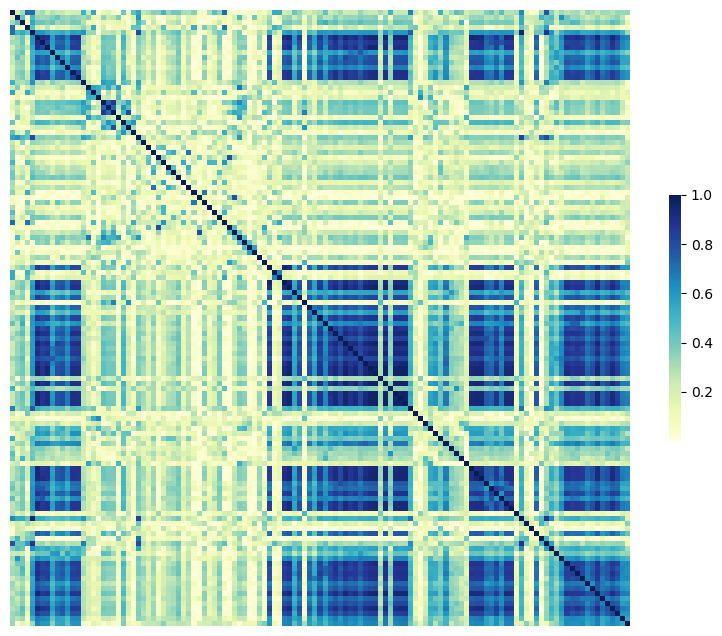

In [11]:
# build a heat map
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(df_corr, cmap="YlGnBu", xticklabels=False, yticklabels=False, ax=ax, cbar_kws={"shrink": 0.4})

We can see that about half of the parameters have a strong correlation with each other, remove these features.

In [12]:
# apply a function that removes strongly correlated parameters
df_small_nonlin = remove_corr(df_corr, df_small, 0.6)

Number of strongly correlated parameters: 81


In [13]:
# calculate the coefficients by absolute value
df_small_nonlin_corr = df_small_nonlin.corr(method='spearman').abs()

<Axes: >

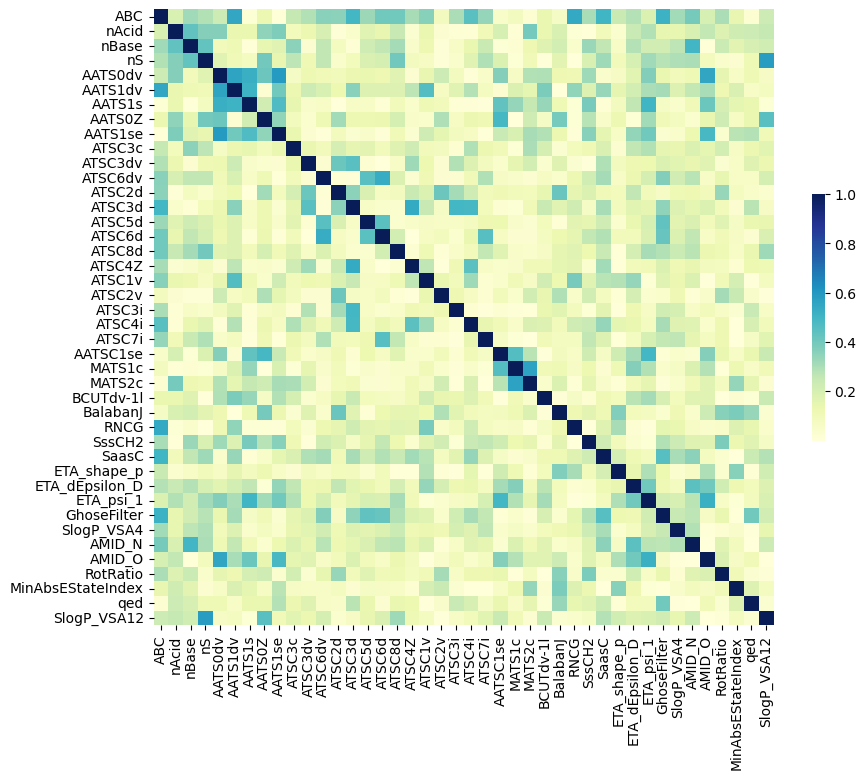

In [14]:
# build a heat map
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(df_small_nonlin_corr, cmap="YlGnBu", ax=ax, cbar_kws={"shrink": 0.4})

Now we have a dataset of 46 parameters, which has low to moderate correlations. Now the number of features is suitable for building a nice looking heat map.

In [15]:
# calculate the number of parameters after removing the strong correlations
print('Number of remaining parameters:', len(df_small_nonlin.columns))

Number of remaining parameters: 42
